In [51]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [52]:
# load dataset
df=pd.read_csv("classification_2.csv",delimiter=',')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [53]:
# rename columns
df.columns=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial_Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss",
        "Hours_per_week", "Country", "Target"]

In [54]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [55]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [56]:
df['Target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [57]:
# df.isnull().sum()

In [58]:
df.isnull().values.any()

False

In [59]:
# replace value -1,1 for <=50K/>50K
df['Target'].replace(' <=50K',-1,inplace=True)
df['Target'].replace(' >50K',1,inplace=True)

In [60]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,-1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,-1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,-1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,-1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,-1


In [61]:
# display columns in dataset
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [62]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [63]:
# display shape of dataset
print('dataset has {0} rows and {1} column'.format(df.shape[0],df.shape[1]))

dataset has 32560 rows and 15 column


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
fnlwgt            32560 non-null int64
Education         32560 non-null object
Education-Num     32560 non-null int64
Martial_Status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital_Gain      32560 non-null int64
Capital_Loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Country           32560 non-null object
Target            32560 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [65]:
# checking missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [66]:
# getting target value greater  than 50k and less than 50k
df['Target'].value_counts()

-1    24719
 1     7841
Name: Target, dtype: int64

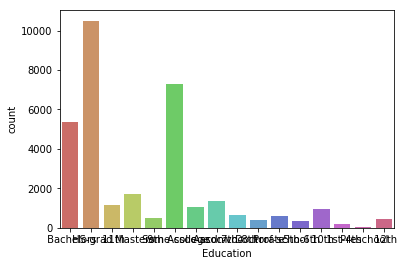

In [67]:
# plot Target of <=50k and >50k
sb.countplot(x='Education',  data=df, palette='hls')
plt.show()

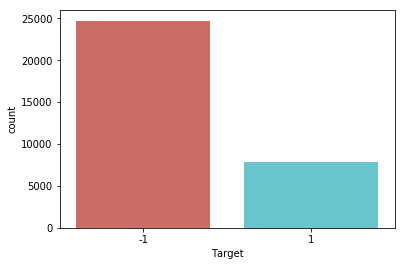

In [68]:
sb.countplot(x='Target',  data=df, palette='hls')
plt.show()

In [69]:
df.duplicated().sum()

24

In [70]:
# remove duplicated values from dataframe
df.drop_duplicates(keep=False, inplace=True)
df.duplicated().sum()

0

In [71]:
df.shape

(32513, 15)

In [72]:
# correlation of multivariate variable
# temp=df.corr(method='pearson')
# temp.head(11)
# corr['Target'].sort_values(ascending=False)[:]

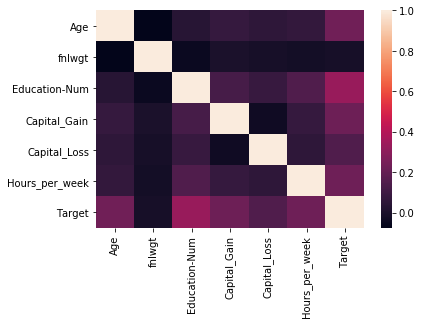

In [73]:
corr = df.corr()
sb.heatmap(corr)

In [74]:
df.shape

(32513, 15)

In [75]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [76]:
df = pd.get_dummies(df,columns=["Workclass","Education","Martial_Status","Occupation","Relationship", "Race", "Sex","Country"])
df.head()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,50,83311,13,0,0,13,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [77]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [78]:
df = Feature_Scaling(df)

In [79]:
# get dummy variables whose are in categorical data
# for name in df.columns:
#     if df[name].dtype != "int64":
#         df[name] = pd.get_dummies(df[name]) 


In [80]:
df.shape

(32513, 109)

In [81]:
df.head()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.452055,0.048238,0.800000,0.0,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.138113,0.533333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.493151,0.151068,0.400000,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.150685,0.221488,0.800000,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.273973,0.184932,0.866667,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
df.shape

(32513, 109)

In [83]:
# split data into train and test
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
        
    return train,test

In [84]:
train,test = Split(df)
train_data=df.head(train)
test_data=df.tail(test)

In [85]:
train_data.head()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.452055,0.048238,0.800000,0.0,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.138113,0.533333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.493151,0.151068,0.400000,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.150685,0.221488,0.800000,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.273973,0.184932,0.866667,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
train_data.shape

(22759, 109)

In [87]:
test_data.shape

(9753, 109)

In [88]:
# Separating the output and the parameters data frame
def separate(df):
    output = df.Target
    return df.drop('Target', axis=1), output

In [89]:
train_data_x,train_data_y = separate(train_data)
test_data_x,test_data_y=separate(test_data)

In [90]:
train_data_x.shape

(22759, 108)

In [91]:
test_data_x.shape

(9753, 108)

In [ ]:
class Multivariate_Logistic2:
    def __init__(self):
        # loads csv file
        self.alpha = 0.01
        self.epoch = 10000
        
    def Train(self, x_data_train, y_data_train,theta_vector):
        for length in range(self.epoch):
            z = (np.dot(theta_vector.T,x_data_train.T))
#             print("z shape,",z.shape)
            sigmoid = (1/(1+np.exp(-z)))
#             print("sigmoid shape:",sigmoid.shape)
            diff = sigmoid - y_data_train.T
#             print("difference:",diff.shape)
            temp = np.dot(diff,x_data_train)
#             print("temp shape:",temp.shape)
            temp = np.divide(np.dot(self.alpha,temp),len(x_data_train))
#             print("temp diff shape:",temp.shape)
            theta_vector = theta_vector-temp.T
        return theta_vector
    
    def classify(self, x_data_test, theta_vector):
        y_prediction = np.zeros((x_data_test.shape[0], 1), dtype=float)
#         print("X:",x_data_test.shape)
#         print("theta:",theta_vector.shape)
        z = np.dot(x_data_test, theta_vector)
        sigmoid = np.array(1 / (1 + np.exp(-z)))
        for i in (range(0, len(sigmoid))):
            if round(sigmoid[i][0],2) <= 0.5:
                y_prediction[i][0] = 0
            else:
                y_prediction[i][0] = 1
        return y_prediction
    
    def accuracy(self, y_data_test, y_pred_test):
        count=0
        for i in range(0,len(y_data_test)):
            if y_pred_test[i]==y_data_test[i]:
                count = count + 1
        return count/len(y_data_test)*100
    
def main():
    obj = Multivariate_Logistic2()
    # calling method by class object
    
    x_train_data = np.array(train_data_x)
#     print("x_train_data:",x_train_data.shape)
    y_train_data = np.array(train_data_y)
    y_train_data = y_train_data.reshape(len(y_train_data),1)
#     print("y_train_data:",y_train_data.shape)

    
    x_test_data = np.array(test_data_x)
#     print("x_test_data:",x_test_data.shape)
    y_test_data = np.array(test_data_y)
    y_test_data=y_test_data.reshape(len(y_test_data),1)
#     print("y_test_data:",y_test_data.shape)
    
    
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))
    
    x_size = 108
    theta_vector = np.full((x_size+1,1),.1)
#     print("theta vector:",theta_vector.shape)
    
    theta_vector = obj.Train(x_train_data, y_train_data,theta_vector)
#     print("theta vector:",theta_vector.shape)

    y_predict_test = obj.classify(x_test_data, theta_vector)
#     print("y_predict test:",y_predict_test.shape)
    
    y_predict_train = obj.classify(x_train_data, theta_vector)
#     print("y_predict train:",y_predict_train.shape)
    
    train_accuracy=obj.accuracy(y_train_data, y_predict_train)
    test_accuracy=obj.accuracy(y_test_data, y_predict_test)

    print("accuracy train:", train_accuracy)
    print("accuracy test:",  test_accuracy)
    
if __name__ == '__main__':
    main()